## Иследование распределений людей в группах из списка top5

In [19]:
import numpy as np
import pandas as pd
import scipy
%pylab inline
# Для отображение кирилицы в надписях на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Импорт данных из файла
data = pd.read_csv('top5.txt', sep = '\t', header = 0)

In [4]:
data.head()

,id_group,title,uid_user,sex,age
0,27895931,Новинки Музыки 2017,479,Ж,28
1,27895931,Новинки Музыки 2017,683,Ж,34
2,27895931,Новинки Музыки 2017,761,Ж,30
3,27895931,Новинки Музыки 2017,914,М,30
4,27895931,Новинки Музыки 2017,916,Ж,30


In [9]:
# Выводим названия групп
names_groups = set(data.title)
for name_group in names_groups:
    print("Группа: " + name_group)

Группа: ПРИКОЛЫ | Смеяка
Группа: Новинки Музыки 2017
Группа: Киномания
Группа: Смейся до слёз :D


Так как в списке ТОП 5 оказались дву группы с одинаковым именем, но разным id то я объединяю их в одну группу, учитывая что тема этих групп одинаковы, то такой произвол буде вполне оправдан. 

#### Распределение участников групп по возрастам

In [171]:
range_age = ('10-15', '16-21', '22-30', '31-40', '41-80', '81 и выше')
ind = np.arange(0.5, len(range_age))
width = 0.9
def splitAges(ages):
    splitet_ages = [0,0,0,0,0,0]
    for age in ages:
        if age >= 10 and age <= 15:
            splitet_ages[0] += 1
        if age >= 16 and age <= 21:
            splitet_ages[1] += 1
        if age >= 22 and age <= 30:
            splitet_ages[2] += 1
        if age >= 31 and age <= 40:
            splitet_ages[3] += 1
        if age >= 41 and age <= 80:
            splitet_ages[4] += 1
        if age >= 81:
            splitet_ages[5] += 1
    return splitet_ages

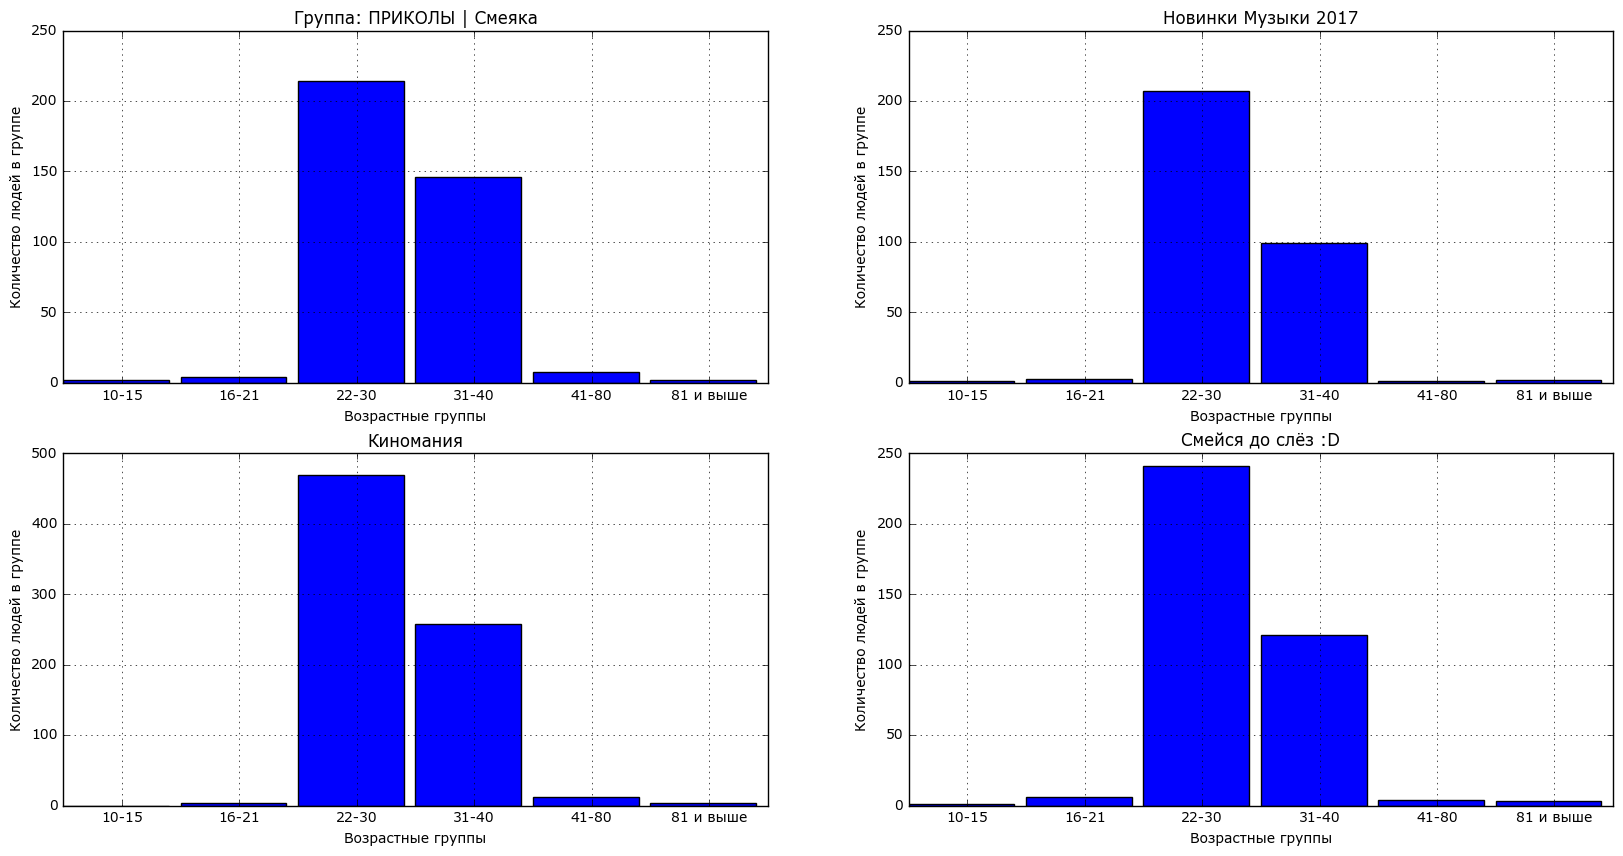

In [174]:
fig, ax = plt.subplots(figsize=(20, 10))

# Группа: ПРИКОЛЫ | Смеяка
ax0 = plt.subplot(2, 2, 1)
df_filtered = data[data['title'] == "ПРИКОЛЫ | Смеяка"]
ages = splitAges(df_filtered.age)
ax0.bar(list(range(len(range_age))), ages, width)
plt.title('Группа: ПРИКОЛЫ | Смеяка')
plt.xlabel('Возрастные группы')
plt.ylabel("Количество людей в группе")
plt.xticks(ind, range_age)

# Группа: Новинки Музыки 2017
ax1 = plt.subplot(2, 2, 2)
df_filtered = data[data['title'] == "Новинки Музыки 2017"]
ages = splitAges(df_filtered.age)
ax1.bar(list(range(len(range_age))), ages, width)
plt.title('Новинки Музыки 2017')
plt.xlabel('Возрастные группы')
plt.ylabel("Количество людей в группе")
plt.xticks(ind, range_age)

# Группа: Новинки Музыки 2017
ax2 = plt.subplot(2, 2, 3)
df_filtered = data[data['title'] == "Киномания"]
ages = splitAges(df_filtered.age)
ax2.bar(list(range(len(range_age))), ages, width)
plt.title('Киномания')
plt.xlabel('Возрастные группы')
plt.ylabel("Количество людей в группе")
plt.xticks(ind, range_age)

# Группа: Смейся до слёз :D
ax3 = plt.subplot(2, 2, 4)
df_filtered = data[data['title'] == "Смейся до слёз :D"]
ages = splitAges(df_filtered.age)
ax3.bar(list(range(len(range_age))), ages, width)
plt.title('Смейся до слёз :D')
plt.xlabel('Возрастные группы')
plt.ylabel("Количество людей в группе")
plt.xticks(ind, range_age)

axes = [ax0, ax1, ax2, ax3]
for ax in axes:
    ax.grid()

plt.show()

#### Распределение участников групп по полам

In [175]:
def splitSex(sexes):
    splitet_sex = [0,0]
    for sex in sexes:
        if sex == "М":
            splitet_sex[0] += 1
            continue
        if sex == "Ж":
            splitet_sex[1] += 1
    return splitet_sex

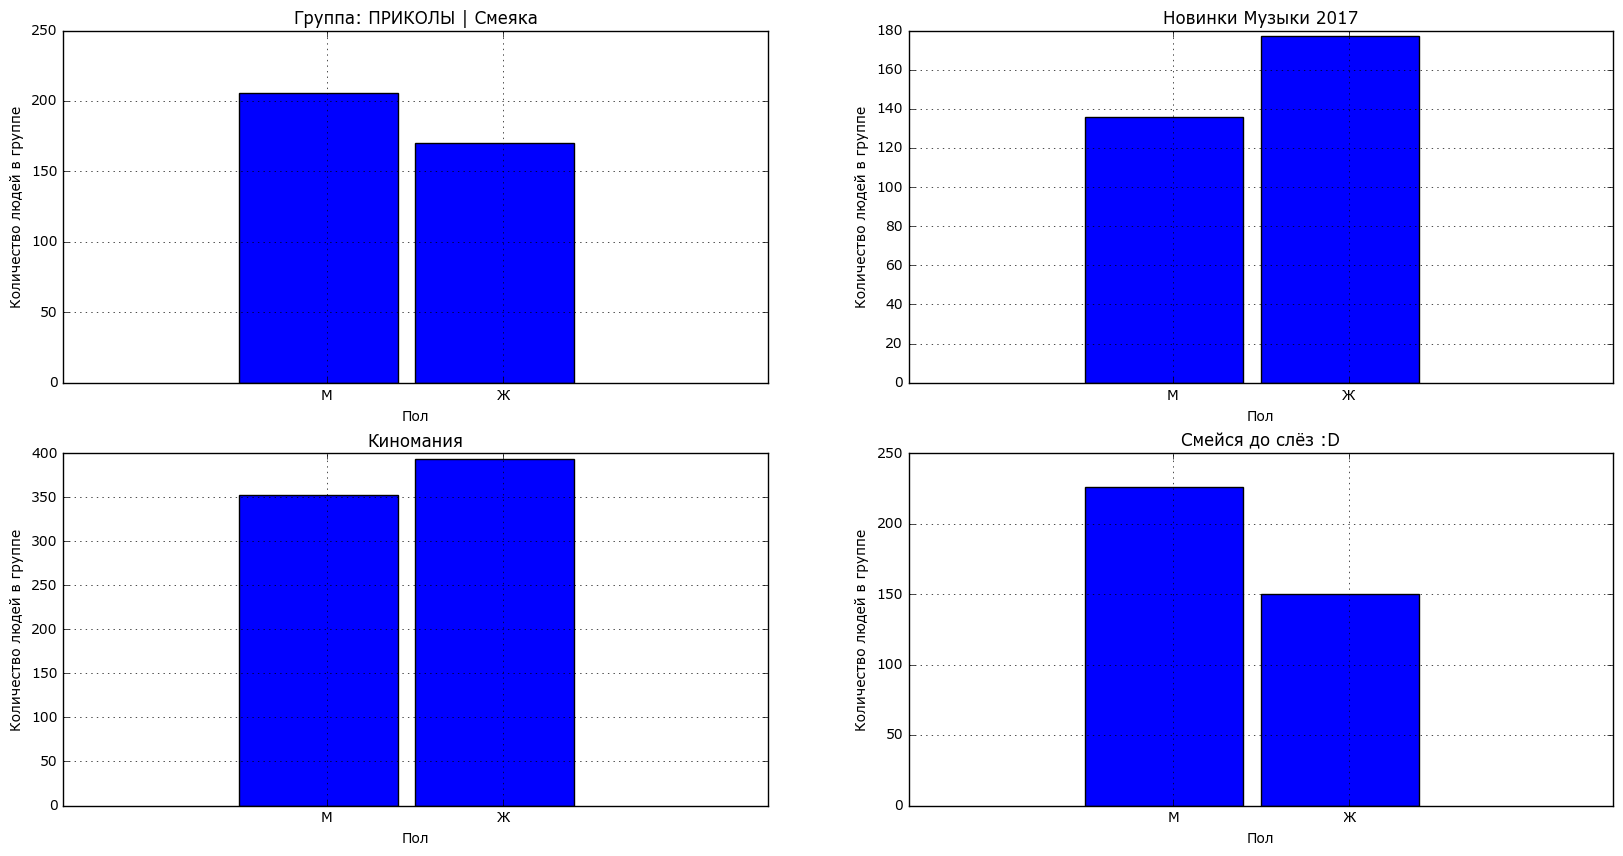

In [182]:
fig, ax = plt.subplots(figsize=(20, 10))

# Группа: ПРИКОЛЫ | Смеяка
ax0 = plt.subplot(2, 2, 1)
df_filtered = data[data['title'] == "ПРИКОЛЫ | Смеяка"]
sexes = splitSex(df_filtered.sex)
ax0.bar([1,2], sexes, width)
plt.title('Группа: ПРИКОЛЫ | Смеяка')
plt.xlabel('Пол')
plt.ylabel("Количество людей в группе")
plt.xticks([1.5, 2.5], ["М", "Ж"])
plt.xlim(0, 4)

# Группа: Новинки Музыки 2017
ax1 = plt.subplot(2, 2, 2)
df_filtered = data[data['title'] == "Новинки Музыки 2017"]
sexes = splitSex(df_filtered.sex)
ax1.bar([1,2], sexes, width)
plt.title('Новинки Музыки 2017')
plt.xlabel('Пол')
plt.ylabel("Количество людей в группе")
plt.xticks([1.5, 2.5], ["М", "Ж"])
plt.xlim(0, 4)

# Группа: Новинки Музыки 2017
ax2 = plt.subplot(2, 2, 3)
df_filtered = data[data['title'] == "Киномания"]
sexes = splitSex(df_filtered.sex)
ax2.bar([1,2], sexes, width)
plt.title('Киномания')
plt.xlabel('Пол')
plt.ylabel("Количество людей в группе")
plt.xticks([1.5, 2.5], ["М", "Ж"])
plt.xlim(0, 4)

# Группа: Смейся до слёз :D
ax3 = plt.subplot(2, 2, 4)
df_filtered = data[data['title'] == "Смейся до слёз :D"]
sexes = splitSex(df_filtered.sex)
ax3.bar([1,2], sexes, width)
plt.title('Смейся до слёз :D')
plt.xlabel('Пол')
plt.ylabel("Количество людей в группе")
plt.xticks([1.5, 2.5], ["М", "Ж"])
plt.xlim(0, 4)

axes = [ax0, ax1, ax2, ax3]
for ax in axes:
    ax.grid()

plt.show()

Выводы: интересная закономероность, юмор больше привлекает мужчин, а вот кино и музыка женщин. :)